<a href="https://colab.research.google.com/github/davidmiheev/aoc-2024/blob/main/advent_of_code_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
# import os 

# for i in range(13):
#     with open(f'day {i + 1}/input.txt', 'w') as file:
#         pass

# Advent of Code 2024

## Day 1

In [189]:
with open('day 1/input.txt') as f:
    lines = f.readlines()

In [190]:
left, right = [], []
for line in lines:
    l, r = line[:-1].split('   ')
    left.append(int(l))
    right.append(int(r))


In [191]:
sum(abs(id2 - id1) for id1, id2 in zip(sorted(left), sorted(right)))

2000468

In [192]:
from collections import Counter

cnt_r = Counter(right)
sum(id1 * cnt_r[id1] for id1 in left)

18567089

## Day 2

In [193]:
with open('day 2/input.txt') as f:
    lines = f.readlines()

In [194]:
reports = []
for line in lines:
    reports.append(line[:-1].split(' '))

reports[:10]

[['19', '21', '24', '27', '24'],
 ['85', '87', '89', '92', '93', '96', '98', '98'],
 ['2', '5', '6', '7', '8', '12'],
 ['63', '66', '69', '72', '75', '82'],
 ['18', '21', '23', '26', '28', '26', '27', '28'],
 ['16', '19', '21', '19', '20', '22', '23', '22'],
 ['37', '39', '37', '38', '41', '42', '44', '44'],
 ['18', '20', '17', '20', '24'],
 ['50', '51', '54', '53', '58'],
 ['73', '76', '77', '80', '83', '83', '84', '85']]

In [195]:
safe_cnt = 0
for report in reports:
    if all(1 <= int(n) - int(p) <= 3 for p, n in zip(report, report[1:])):
        safe_cnt += 1
    if all(-3 <= int(n) - int(p) <= -1 for p, n in zip(report, report[1:])):
        safe_cnt += 1

safe_cnt

407

In [196]:
def check(report, l, r):
    x = [l <= int(n) - int(p) <= r for p, n in zip(report, report[1:])]
    if sum(x) == len(report) - 1:
        return True
    i = x.index(False)
    if i == len(report) - 2:
        return True
    report_1, report_2 = report[:i] + report[i + 1:], report[:i + 1] + report[i + 2:]
    if all(l <= int(n) - int(p) <= r for p, n in zip(report_1, report_1[1:])):
        return True
    if all(l <= int(n) - int(p) <= r for p, n in zip(report_2, report_2[1:])):
        return True
    return False

In [197]:
safe_cnt = 0
for report in reports:
    if check(report, 1, 3):
        safe_cnt += 1
        continue
    if check(report, -3, -1):
        safe_cnt += 1

safe_cnt

459

## Day 3

In [198]:
with open('day 3/input.txt') as f:
    lines = f.readlines()

len(lines)

6

In [199]:
import re

res = 0
for i, line in enumerate(lines):
    for m in re.finditer('mul\([0-9]{1,3},[0-9]{1,3}\)', line):
        a, b = m.group()[4:-1].split(',')
        a, b = int(a), int(b)
        res += a * b

res

<>:5: SyntaxWarning: invalid escape sequence '\('
<>:5: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_5649/1902020063.py:5: SyntaxWarning: invalid escape sequence '\('
  for m in re.finditer('mul\([0-9]{1,3},[0-9]{1,3}\)', line):


168539636

In [200]:
res = 0
do = True
for i, line in enumerate(lines):
    for m in re.finditer("do\(\)|don't\(\)|mul\([0-9]{1,3},[0-9]{1,3}\)", line):
        if m.group() == 'do()':
            do = True
            continue
        if m.group() == 'don\'t()':
            do = False
            continue
        if not do:
            continue
        a, b = m.group()[4:-1].split(',')
        a, b = int(a), int(b)
        res += a * b

res

<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_5649/1879000204.py:4: SyntaxWarning: invalid escape sequence '\('
  for m in re.finditer("do\(\)|don't\(\)|mul\([0-9]{1,3},[0-9]{1,3}\)", line):


97529391

## Day 4

In [201]:
with open('day 4/input.txt') as f:
    lines = f.readlines()

len(lines), len(lines[0]) - 1

(140, 140)

In [202]:
import re

res = 0
for line in lines:
    for m in re.finditer('XMAS', line):
        res += 1
    for m in re.finditer('SAMX', line):
        res += 1

res

441

In [203]:
diagonals = []

for i in range(-len(lines) + 1, len(lines)):
    diagonal = []
    for j in range(len(lines) - abs(i)):
        if i < 0:
            diagonal.append(lines[j + abs(i)][j])
        else:
            diagonal.append(lines[j][j + i])

    # diagonals.append(''.join(diagonal))
    for m in re.finditer('XMAS', ''.join(diagonal)):
        res += 1
    for m in re.finditer('SAMX', ''.join(diagonal)):
        res += 1

for i in range(len(lines)):
    diagonal = []
    for j in range(i + 1):
        diagonal.append(lines[i - j][j])

    for m in re.finditer('XMAS', ''.join(diagonal)):
        res += 1
    for m in re.finditer('SAMX', ''.join(diagonal)):
        res += 1


for i in range(1, len(lines)):
    diagonal = []
    for j in range(len(lines) - i):
        diagonal.append(lines[-j - 1][j + i])

    for m in re.finditer('XMAS', ''.join(diagonal)):
        res += 1
    for m in re.finditer('SAMX', ''.join(diagonal)):
        res += 1

for i in range(len(lines)):
    vertical = []
    for line in lines:
        vertical.append(line[i])

    for m in re.finditer('XMAS', ''.join(vertical)):
        res += 1
    for m in re.finditer('SAMX', ''.join(vertical)):
        res += 1

res

2718

In [204]:
res = 0
for i in range(len(lines) - 2):
    for j in range(len(lines[0]) - 3):
        if ''.join([lines[i][j], lines[i + 1][j + 1], lines[i + 2][j + 2]]) in ('MAS', 'SAM') \
            and ''.join([lines[i][j + 2], lines[i + 1][j + 1], lines[i + 2][j]]) in ('MAS', 'SAM'):
            res += 1

res

2046

## Day 5

In [205]:
with open('day 5/input.txt') as f:
    lines = f.readlines()

len(lines)

1374

In [206]:
rules = []
updates = []
t = 0
for i, line in enumerate(lines):
    if line == '\n':
        t = 1
        continue
    if t == 0:
        rules.append(line[:-1].split('|'))
    if t == 1:
        updates.append(line[:-1].split(','))

rules[:10], updates[:10]

([['95', '51'],
  ['92', '45'],
  ['92', '39'],
  ['55', '51'],
  ['55', '91'],
  ['55', '43'],
  ['46', '93'],
  ['46', '69'],
  ['46', '84'],
  ['46', '99']],
 [['37',
   '45',
   '96',
   '69',
   '95',
   '88',
   '81',
   '24',
   '52',
   '86',
   '18',
   '55',
   '68',
   '76',
   '61',
   '57',
   '58',
   '23',
   '62',
   '91',
   '54'],
  ['97', '71', '66', '28', '95', '86', '18', '76', '61', '14', '57'],
  ['11', '58', '62', '65', '82', '76', '43'],
  ['35',
   '93',
   '66',
   '42',
   '86',
   '45',
   '88',
   '67',
   '96',
   '26',
   '73',
   '71',
   '95',
   '81',
   '24'],
  ['64',
   '95',
   '88',
   '81',
   '24',
   '52',
   '86',
   '18',
   '55',
   '68',
   '76',
   '61',
   '14',
   '44',
   '57',
   '58',
   '23',
   '62',
   '91',
   '51',
   '38',
   '65',
   '32'],
  ['69',
   '88',
   '81',
   '24',
   '86',
   '18',
   '55',
   '68',
   '76',
   '61',
   '14',
   '44',
   '57',
   '58',
   '23',
   '62',
   '91',
   '54',
   '51',
   '38',
   '65'],

In [207]:
from collections import defaultdict

res = 0
for update in updates:
    inds = defaultdict(int)
    for i, e in enumerate(update):
        inds[int(e)] = i


    if all(inds.get(int(a), -1) < inds.get(int(b), 100) for a, b in rules):
        res += int(update[len(update) // 2])

res

6260

In [208]:
res = 0
for update in updates:
    inds = defaultdict(int)
    prev_t, t = -1, 0
    for i, e in enumerate(update):
        inds[int(e)] = i

    while prev_t != t:
        prev_t = t
        for a, b in rules:
            if inds.get(int(a), -1) > inds.get(int(b), 100):
                t += 1
                i, j = inds.get(int(a), -1), inds.get(int(b), 100)
                update[i], update[j] = update[j], update[i]
                inds[int(a)], inds[int(b)] = inds[int(b)], inds[int(a)]
                break

    if t:
        res += int(update[len(update) // 2])

res

5346

## Day 6

In [209]:
with open('day 6/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(130, 130)

In [210]:
dirs = [(-1, 0), (0, 1), (1, 0), (0, -1)]
cur_pos, cur_dir = None, 0

for i, line in enumerate(lines):
    for j, e in enumerate(line[:-1]):
        if e == '^':
            cur_pos = (i, j)
            break

cur_pos

(79, 87)

In [211]:
seen = set()
def simulate_route(cur_pos, cur_dir):
    visited = set()

    while True:
        visited.add((cur_pos, cur_dir))
        seen.add(cur_pos)
        next_pos = (cur_pos[0] + dirs[cur_dir][0], cur_pos[1] + dirs[cur_dir][1])
        if not (0 <= next_pos[0] <= m - 1 and 0 <= next_pos[1] <= n - 1):
            break
        if lines[next_pos[0]][next_pos[1]] == '#':
            cur_dir = (cur_dir + 1) % 4
        else:
          cur_pos = next_pos
        if (cur_pos, cur_dir) in visited:
            return 1

    return 0

simulate_route(cur_pos, cur_dir)
print(len(seen))

4602


In [212]:
# import sys
# from functools import cache

# sys.setrecursionlimit(130 * 130)



# dirs = [(-1, 0), (0, 1), (1, 0), (0, -1)]

# def search(cur_pos, cur_dir, lines):
#     # Check if the current position is out of bounds
#     if not (0 < cur_pos[0] < m - 1 and 0 < cur_pos[1] < n - 1):
#         return False  # Out of bounds, no loop found

#     next_pos = (cur_pos[0] + dirs[cur_dir][0], cur_pos[1] + dirs[cur_dir][1])

#     # If the next position is a wall, turn right (change direction)
#     if lines[next_pos[0]][next_pos[1]] == '#':
#         if cur_pos in path and path[cur_pos] == (cur_dir + 1) % 4:
#             return True
#         return search(cur_pos, (cur_dir + 1) % 4, lines)

#     path[cur_pos] = cur_dir
#     # Continue searching from the next position
#     return search(next_pos, cur_dir, lines)

In [213]:
lines = [list(line[:-1]) for line in lines]

In [214]:
# lines

In [215]:
cur_pos, cur_dir = (79, 87), 0
# cur_pos, cur_dir = (6, 4), 0
loop_obs = set()
while 0 < cur_pos[0] < m - 1 and 0 < cur_pos[1] < n - 1:
    next_pos = (cur_pos[0] + dirs[cur_dir][0], cur_pos[1] + dirs[cur_dir][1])

    # If the next position is a wall, turn right
    if lines[next_pos[0]][next_pos[1]] == '#':
        cur_dir = (cur_dir + 1) % 4
        continue


    # Check for loops
    lines[next_pos[0]][next_pos[1]] = '#'
    if simulate_route(cur_pos, cur_dir):
        loop_obs.add(next_pos)
    lines[next_pos[0]][next_pos[1]] = '.'
    # Mark the current position and direction as visited
    cur_pos = next_pos

# for pos in loop_obs:
#     lines[pos[0]][pos[1]] = 'O'

len(loop_obs) if (79, 87) not in loop_obs else len(loop_obs) - 1

1780

In [216]:
lines[79][87] = '^'
def parse_grid(lines):
    """Parse the input grid and find the guard's starting position and direction."""
    directions = {'^': 0, '>': 1, 'v': 2, '<': 3}
    grid = []
    start_pos = None
    start_dir = None

    for i, line in enumerate(lines):
        row = list(line)
        for j, cell in enumerate(row):
            if cell in directions:
                start_pos = (i, j)
                start_dir = directions[cell]
                row[j] = '.'  # Replace guard's starting position with empty space
        grid.append(row)
    return grid, start_pos, start_dir

def simulate_movement(grid, start_pos, start_dir):
    """Simulate the guard's movement and track visited positions."""
    dirs = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # Up, Right, Down, Left
    m, n = len(grid), len(grid[0])
    visited = set()
    pos, direction = start_pos, start_dir

    while True:
        # Record current position and direction
        visited.add((pos, direction))
        next_pos = (pos[0] + dirs[direction][0], pos[1] + dirs[direction][1])

        # If out of bounds, stop
        if not (0 <= next_pos[0] < m and 0 <= next_pos[1] < n):
            break

        # If obstacle, turn right
        if grid[next_pos[0]][next_pos[1]] == '#':
            direction = (direction + 1) % 4
        else:
            pos = next_pos  # Move forward

        # If revisiting the same position and direction, loop detected
        if (pos, direction) in visited:
            return True

    return False

def find_loop_positions(grid, start_pos, start_dir):
    """Find all positions where placing an obstruction causes a loop."""
    loop_positions = []
    m, n = len(grid), len(grid[0])

    for i in range(m):
        for j in range(n):
            if grid[i][j] == '.' and (i, j) != start_pos:
                # Temporarily place an obstruction
                grid[i][j] = '#'

                # Check if placing the obstruction causes a loop
                if simulate_movement(grid, start_pos, start_dir):
                    loop_positions.append((i, j))

                # Remove the obstruction
                grid[i][j] = '.'

    return loop_positions


# Parse the input grid
grid, start_pos, start_dir = parse_grid(lines)

# Find valid obstruction positions
loop_positions = find_loop_positions(grid, start_pos, start_dir)

# Output the result
print("Number of valid positions:", len(loop_positions))
# print("Valid positions:", loop_positions)

Number of valid positions: 1703


## Day 7


In [217]:
with open('day 7/input.txt') as f:
    lines = f.readlines()

len(lines)

850

In [218]:
(81 + 40) * 27

3267

In [219]:
targets, eqs = [], []
for line in lines:
    target, eq = line[:-1].split(': ')
    eq = eq.split(' ')
    targets.append(int(target))
    eqs.append(eq)

print(targets[:10], eqs[:10])

[487656, 65816524826, 90059295, 2109036, 191815905829, 289979206, 26683869669, 829027, 1182822246, 12212256] [['43', '7', '54', '3', '6', '28'], ['3', '29', '7', '451', '5', '64', '26', '1', '1', '9'], ['900', '1', '592', '92'], ['59', '8', '133', '7', '83', '1', '6'], ['7', '4', '2', '7', '1', '979', '9', '8', '1', '638', '9'], ['49', '587', '234', '9', '206'], ['51', '654', '837', '8', '69'], ['827', '34', '83', '85', '2', '5'], ['41', '2', '7', '40', '8', '6', '839', '7', '4', '8'], ['8', '4', '31', '4', '1', '7', '655', '4', '9', '6', '8', '7']]


In [220]:
from functools import cache

@cache
def dp(i, op, cur, target, eq):
    if i == len(eq) - 1:
        return cur == target

    return dp(i + 1, 0, cur + int(eq[i + 1]), target, eq) or dp(i + 1, 1, cur * int(eq[i + 1]), target, eq)


In [221]:
ans = 0
for target, eq in zip(targets, eqs):
    if dp(0, 0, int(eq[0]), target, tuple(eq)):
        ans += target

ans

1260333054159

In [258]:
from functools import cache

@cache
def dp(i, op, cur, target, eq):
    if i == len(eq) - 1:
        return cur == target

    return dp(i + 1, 2, int(str(cur) + eq[i + 1]), target, eq) or dp(i + 1, 0, cur + int(eq[i + 1]), target, eq) or dp(i + 1, 1, cur * int(eq[i + 1]), target, eq)


In [259]:
ans = 0
for target, eq in zip(targets, eqs):
    if dp(0, 0, int(eq[0]), target, tuple(eq)):
        ans += target

ans

162042343638683

## Day 8

In [224]:
with open('day 8/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(50, 50)

In [225]:
from dataclasses import dataclass

@dataclass(unsafe_hash=True)
class Vector:
    x: int
    y: int

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def __mul__(self, k: int):
        return Vector(self.x * k, self.y * k)


In [226]:
a, b = Vector(1, 2), Vector(3, 4)
a + b, a - b
a + Vector(1, 1) * 2 == b
x= {}
x[Vector(1, 2)] = 1
x[Vector(1, 3)] = 2
x

{Vector(x=1, y=2): 1, Vector(x=1, y=3): 2}

In [227]:
antennas = {}
for i, line in enumerate(lines):
    for j, e in enumerate(line[:-1]):
        if e != '.':
            antennas[Vector(i, j)] = e

len(antennas)

166

In [228]:
from itertools import product

antinodes = set()
for a, b in product(antennas, repeat=2):
    if a == b or antennas[a] != antennas[b]:
        continue
    u, v = a + (b - a) * 2, b + (a - b) * 2
    if 0 <= u.x < m and 0 <= u.y < n:
        antinodes.add(u)
    if 0 <= v.x < m and 0 <= v.y < n:
        antinodes.add(v)

len(antinodes)

289

In [229]:
from itertools import product

antinodes = set()
for a, b in product(antennas, repeat=2):
    if a == b or antennas[a] != antennas[b]:
        continue

    p1, p2, t = a, b, 0
    while (0 <= p1.x < m and 0 <= p1.y < n) or (0 <= p2.x < m and 0 <= p2.y < n):
        p1, p2 = a + (b - a) * t, b + (a - b) * t
        if 0 <= p1.x < m and 0 <= p1.y < n:
            antinodes.add(p1)
        if 0 <= p2.x < m and 0 <= p2.y < n:
            antinodes.add(p2)
        t += 1


len(antinodes)

1030

## Day 9

In [230]:
with open('day 9/input.txt') as f:
    lines = f.readlines()

len(lines[0]) - 1

19999

In [231]:
memory = {}
id = 0
cur_ptr = 0
allocated = 0
for i, e in enumerate(lines[0][:-1]):
    if i % 2:
        for ptr in range(cur_ptr, cur_ptr + int(e)):
            memory[ptr] = -1

        cur_ptr += int(e)
    else:
        for ptr in range(cur_ptr, cur_ptr + int(e)):
            memory[ptr] = id

        allocated += int(e)
        cur_ptr += int(e)
        id += 1

memory[2]
memory[len(memory)-1], id, allocated

(9999, 10000, 49744)

In [232]:
first_free = 2
last_allocated = len(memory) - 1
while first_free < allocated:
    memory[first_free], memory[last_allocated] = memory[last_allocated], -1
    while memory[first_free] != -1:
        first_free += 1
    while memory[last_allocated] == -1:
        last_allocated -= 1

first_free, last_allocated
memory[2]

9999

In [233]:
# for ptr, id in memory.items():
#     if ptr < 100:
#         print(id)
# ''.join(str(id) for id in memory.values())

0099811188827773336446555566..............

In [234]:
checksum = 0
for ptr, id in memory.items():
    if id == -1:
        continue
    checksum += id * ptr

checksum

6283404590840

In [235]:
free_chunks = []
allocated_chunks = []
id = 0
cur_ptr = 0
for i, e in enumerate(lines[0][:-1]):
    if i % 2:
        if int(e) > 0:
            free_chunks.append((cur_ptr, int(e)))
            cur_ptr += int(e)
    elif int(e):
        allocated_chunks.append((cur_ptr, int(e), id))
        cur_ptr += int(e)
        id += 1

free_chunks[:10], allocated_chunks[:10]

([(2, 2),
  (5, 7),
  (20, 7),
  (36, 1),
  (40, 5),
  (54, 9),
  (71, 8),
  (83, 2),
  (87, 7),
  (98, 1)],
 [(0, 1, 0),
  (1, 1, 1),
  (4, 1, 2),
  (12, 8, 3),
  (27, 9, 4),
  (37, 3, 5),
  (45, 4, 6),
  (49, 5, 7),
  (63, 8, 8),
  (79, 4, 9)])

In [236]:
from collections import deque



free_chunks, moved_chunks = deque(free_chunks), []
stayed_chunks = []
while allocated_chunks:
    free_ptr, free_size = free_chunks.popleft()
    allocated_ptr, allocated_size, allocated_id = allocated_chunks.pop()
    cnt = 0

    while cnt < len(free_chunks) and free_ptr < allocated_ptr and allocated_size > free_size:
        free_chunks.append((free_ptr, free_size))
        free_ptr, free_size = free_chunks.popleft()
        cnt += 1



    if free_ptr < allocated_ptr and allocated_size <= free_size:
        moved_chunks.append((free_ptr, allocated_size, allocated_id))
        if free_size > allocated_size:
            free_chunks.appendleft((free_ptr + allocated_size, free_size - allocated_size))
    else:
        stayed_chunks.append((allocated_ptr, allocated_size, allocated_id))
        free_chunks.appendleft((free_ptr, free_size))


    free_chunks.rotate(cnt)


In [237]:
moved_chunks[:10]

[(5, 4, 9999),
 (20, 4, 9998),
 (54, 9, 9997),
 (40, 5, 9996),
 (71, 4, 9995),
 (75, 4, 9994),
 (87, 6, 9993),
 (107, 4, 9992),
 (2, 1, 9991),
 (124, 6, 9990)]

In [238]:
stayed_chunks[:10]

[(51691, 9, 5454),
 (51568, 9, 5440),
 (51518, 9, 5435),
 (51407, 9, 5423),
 (51332, 9, 5412),
 (51147, 9, 5392),
 (50949, 9, 5368),
 (50859, 9, 5360),
 (50766, 9, 5352),
 (50714, 9, 5346)]

00992111777.44.333....5555.6666.....8888..

In [239]:
checksum = 0
for ptr, size, id in moved_chunks:
    checksum += id * (2 * ptr + size - 1) * size // 2

for ptr, size, id in stayed_chunks:
    checksum += id * (2 * ptr + size - 1) * size // 2

checksum

6304576012713

In [240]:
a = 0xffff
a & 2024

2024

## Day 10

In [241]:
with open('day 10/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(43, 43)

In [242]:
hmap = [[int(h) for h in line[:-1]] for line in lines]
m, n = len(hmap), len(hmap[0])
m, n

(43, 43)

In [243]:
def bfs_matrix(start):
    '''
    Do a BFS in a matrix.

    Time complexity: :math:`O(mn)`

    Space complexity: :math:`O(mn)`
    where m is the number of rows and n is the number of columns in the matrix

    :param start: tuple
    :return: int
    '''
    from collections import deque, defaultdict

    dirs = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    seen = set([start])
    q = deque([(start[0], start[1])])
    score = 0
    while q:
        r, c = q.popleft()
        if hmap[r][c] == 9:
            score += 1
        for dr, dc in dirs:
            if r + dr >= m or r + dr < 0 or c + dc >= n or c + dc < 0:
                continue
            if (r + dr, c + dc) in seen or (hmap[r + dr][c + dc] - hmap[r][c]) != 1:
                continue
            q.append((r + dr, c + dc))
            seen.add((r + dr, c + dc))
    
    return score


In [244]:
total_score = 0
for i, line in enumerate(hmap):
    for j, h in enumerate(line):
        if h == 0:
            total_score += bfs_matrix((i, j))

total_score

501

In [245]:
def dfs_matrix(r, c):
    if hmap[r][c] == 9:
        return 1

    dirs = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    rating = 0
    for dr, dc in dirs:
        if r + dr >= m or r + dr < 0 or c + dc >= n or c + dc < 0:
            continue
        if hmap[r + dr][c + dc] - hmap[r][c] != 1:
            continue
        rating += dfs_matrix(r + dr, c + dc)

    return rating


In [246]:
total_rating = 0
for i, line in enumerate(hmap):
    for j, h in enumerate(line):
        if h == 0:
            total_rating += dfs_matrix(i, j)

total_rating

1017

## Day 11

In [247]:
init_arrangement = ['8435', '234', '928434', '14', '0', '7', '92446', '8992692']
init_arrangement

['8435', '234', '928434', '14', '0', '7', '92446', '8992692']

In [248]:
init_arrangement = ['8435', '234', '928434', '14', '0', '7', '92446', '8992692']
init_arrangement = {i:v for i, v in enumerate(init_arrangement)}
for _ in range(25):
    arrangement = init_arrangement.copy()
    i = 0
    for stone in arrangement.values():
        if not len(stone) % 2:
            init_arrangement[i] = str(int(stone[:len(stone) // 2]))
            init_arrangement[i + 1] = str(int(stone[len(stone) // 2:]))
            i += 2
        else:
            init_arrangement[i] = str(2024 * int(stone)) if int(stone) else '1'
            i += 1

len(init_arrangement)

182081

In [249]:
from functools import cache

@cache
def dfs(stone, level):
    if not level:
        return 1
    if not len(stone) % 2:
        return dfs(str(int(stone[:len(stone) // 2])), level - 1) + dfs(str(int(stone[len(stone) // 2:])), level - 1)
    return dfs(str(2024 * int(stone)), level - 1) if int(stone) else dfs('1', level - 1)


In [250]:
init_arrangement = ['8435', '234', '928434', '14', '0', '7', '92446', '8992692']

sum(dfs(stone, 75) for stone in init_arrangement)

216318908621637

## Day 12

In [251]:
with open('day 12/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(140, 140)

In [252]:
def calculate_cost():
    dirs = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    area, perimeter = 0, 0
    seen = set()

    def dfs(i, j):
        nonlocal area, perimeter
        if (i, j) in seen:
            return
        seen.add((i, j))
        area += 1
        perimeter += 4
        for di, dj in dirs:
            if 0 <= i + di < m and 0 <= j + dj < n and lines[i + di][j + dj] == lines[i][j]:
                perimeter -= 1
                dfs(i + di, j + dj)

    total_cost = 0
    for i, line in enumerate(lines):
        for j, plot in enumerate(line[:-1]):
            if (i, j) in seen:
                continue
            area, perimeter = 0, 0
            dfs(i, j)
            total_cost += area * perimeter

    return total_cost


total_cost = calculate_cost()
total_cost

1522850

In [253]:
from collections import defaultdict

print('Union-Find')


class UnionFind:
    '''
    Union-Find data structure

    Variant with size of component attribute (for optimization)
    and number of components attribute
    '''
    def __init__(self, n: int, vertices = None):
        '''
        Initialize the Union-Find data structure with the given number of vertices.

        Time complexity: :math:`O(n)`, where n is the number of vertices.

        Space complexity: :math:`O(n)`, where n is the number of vertices.
        '''
        if vertices:
            self.parent = {v: v for v in vertices}
            self.size = {v: 1 for v in vertices}
            self.components = len(vertices)
        else:
            self.parent = list(range(n + 1))
            self.size = [1] * (n + 1)
            self.components = n


    def find(self, x: int) -> int:
        '''
        Find the parent of the given node.

        Time complexity: :math:`O(a(n))`

        Space complexity: :math:`O(1)`
        '''
        if self.parent[x] == x:
            return x
        self.parent[x] = self.find(self.parent[x])
        return self.parent[x]


    def union(self, x: int, y: int) -> int:
        '''
        Union the components that the given nodes belong to.

        Time complexity: :math:`O(a(n))`, where a(n) is the inverse Ackermann function (very slow growing function).

        Space complexity: :math:`O(1)`
        '''
        x = self.find(x)
        y = self.find(y)
        if x == y:
            return 0

        if self.size[x] > self.size[y]:
            self.size[x] += self.size[y]
            self.parent[y] = x
        else:
            self.size[y] += self.size[x]
            self.parent[x] = y

        self.components -= 1
        return 1


    def are_connected(self, x: int, y: int) -> bool:
        '''
        Check if the given nodes are connected

        Time complexity: :math:`O(a(n))`, where a(n) is the inverse Ackermann function (very slow growing function).

        Space complexity: :math:`O(1)`
        '''
        return self.find(x) == self.find(y)


# Example usage:
vertices = [1, 2, 3, 4, 5, 6, 7]
uf = UnionFind(7, vertices)
graph = [(1, 2), (2, 3), (1, 3), (1, 4), (2, 5), (6, 7)]
connected_components = len(vertices)
cycles = 0
for x, y in graph:
    if uf.are_connected(x, y):
        cycles += 1
    else:
        connected_components -= 1
        uf.union(x, y)

print(f'N of connected components: {connected_components}, N of cycles: {cycles}')
print(uf.components)

Union-Find
N of connected components: 2, N of cycles: 1
2


In [254]:
def calculate_cost_w_discount():
    dirs = [(1, 0), (0, -1), (-1, 0), (0, 1)]
    seen = set()

    def dfs(i, j):
        nonlocal area
        if (i, j) in seen:
            return
        seen.add((i, j))
        area += 1
        for di, dj in dirs:
            if 0 <= i + di < m and 0 <= j + dj < n and lines[i + di][j + dj] == lines[i][j]:
                dfs(i + di, j + dj)
            else:
                fence.add((i + di, j + dj, di, dj))

    def count_sides(fence):
        uf = UnionFind(len(fence), fence)
        for i, j, di, dj in fence:
            di_, dj_ = dj, di
            if (i + di_, j + dj_, di, dj) in fence:
                uf.union((i, j, di, dj), (i + di_, j + dj_, di, dj))
            if (i - di_, j - dj_, di, dj) in fence:
                uf.union((i, j, di, dj), (i - di_, j - dj_, di, dj))

        return uf.components


    total_cost = 0
    for i, line in enumerate(lines):
        for j, plot in enumerate(line[:-1]):
            if (i, j) in seen:
                continue
            area, fence = 0, set()
            dfs(i, j)
            total_cost += area * count_sides(fence)

    return total_cost


total_cost = calculate_cost_w_discount()
total_cost

953738

## Day 13

In [1]:
with open('day 13/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(1279, 20)

In [2]:
def min_tokens_to_win_all(lines):
    from functools import cache
    from math import inf
    
    def brute_force():
        for a in range(101):
            for b in range(101):
                if a * a_x + b * b_x == X and a * a_y + b * b_y == Y:
                    return 3 * a + b

        return inf
    
    total_min_tokens = 0
    for i in range(0, m, 4):
        a_x, a_y = int(lines[i][12:14]), int(lines[i][18:20])
        b_x, b_y = int(lines[i + 1][12:14]), int(lines[i + 1][18:20])
        X, Y = int(lines[i + 2].split(',')[0][9:]), int(lines[i + 2].split(',')[1][3:])
        min_tokens = brute_force()
        total_min_tokens += min_tokens if min_tokens != inf else 0

    return total_min_tokens
    
min_tokens_to_win_all(lines)

26810

In [19]:
def min_tokens_to_win_all_adjust(lines):
    from functools import cache
    from math import inf, gcd

    adjustment = 10_000_000_000_000
    
    def solver(a_x, a_y, b_x, b_y, X, Y):
        nonlocal cnt
        if (X + adjustment) % gcd(a_x, b_x) or (Y + adjustment) % gcd(a_y, b_y):
            return inf
        
        u, v = a_x // gcd(a_x, b_x), b_x // gcd(a_x, b_x)
        a_0, b_0 = None, None
        for a in range(2 * v + 1):
            if not (X + adjustment - a * a_x) % b_x:
                a_0, b_0 = a, (X + adjustment - a * a_x) // b_x
                break
        

        if (Y + adjustment - a_0 * a_y - b_0 * b_y) % (v * a_y - u * b_y):
            return inf
        k = (Y + adjustment - a_0 * a_y - b_0 * b_y) // (v * a_y - u * b_y)
        a, b = a_0 + k * v, b_0 - k * u
        
        # if Y + adjustment != a_y * a + b_y * b:
        #     # print('strange', X + adjustment, Y + adjustment, a_x * a + b_x * b, a_y * a + b_y * b)
        #     cnt += 1
        # print(cnt)
        
        return 3 * a + b
    
    
    total_min_tokens = 0
    cnt = 0
    for i in range(0, m, 4):
        a_x, a_y = int(lines[i][12:14]), int(lines[i][18:20])
        b_x, b_y = int(lines[i + 1][12:14]), int(lines[i + 1][18:20])
        X, Y = int(lines[i + 2].split(',')[0][9:]), int(lines[i + 2].split(',')[1][3:])

        min_tokens = solver(a_x, a_y, b_x, b_y, X, Y)
        total_min_tokens += min_tokens if min_tokens != inf else 0


    return total_min_tokens
    
min_tokens_to_win_all_adjust(lines)

108713182988244

5

(2716, 2716)

## Day 14

In [1]:
with open('day 14/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(500, 16)

In [2]:
robots_pos, robots_vel = [], []
for line in lines:
    if line[0] == 'x':
        print(line)
        break
    pos, vel = line[:-1].split(' ')
    robots_pos.append(pos[2:].split(','))
    robots_vel.append(vel[2:].split(','))

robots_pos[:10], robots_vel[:10]

([['7', '85'],
  ['4', '17'],
  ['60', '71'],
  ['82', '99'],
  ['56', '11'],
  ['20', '25'],
  ['57', '97'],
  ['89', '37'],
  ['32', '51'],
  ['72', '40']],
 [['-65', '-36'],
  ['-37', '-76'],
  ['-8', '-19'],
  ['20', '-59'],
  ['50', '-21'],
  ['66', '12'],
  ['-67', '-20'],
  ['10', '52'],
  ['46', '56'],
  ['26', '-80']])

In [3]:
q1, q2, q3, q4 = 0, 0, 0, 0
w, h = 101, 103
for pos, vel in zip(robots_pos, robots_vel):
    x, y = int(pos[0]), int(pos[1])
    x = (x + int(vel[0]) * 100) % w
    y = (y + int(vel[1]) * 100) % h
    if x < w // 2 and y < h // 2:
        q1 += 1
    elif x < w // 2 and y > h // 2:
        q2 += 1
    elif x > w // 2 and y < h // 2:
        q3 += 1
    elif x > w // 2 and y > h // 2:
        q4 += 1

print(q1, q2, q3, q4)
q1 * q2 * q3 * q4

111 119 131 132


228410028

In [4]:
def find_christmas_tree(robots_pos, robots_vel, w=101, h=103):
    from collections import defaultdict
    from math import inf
    possible = 0
    min_var = inf
    for t in range(101 * 103 + 1):
        var = 0
        for pos, vel in zip(robots_pos, robots_vel):
            x, y = (int(pos[0]) + t * int(vel[0])) % w, (int(pos[1]) + t * int(vel[1])) % h
            var += (x - 50) ** 2 + (y - 51) ** 2

        if var < min_var:
            possible = t
            min_var = var

    return possible

possible = find_christmas_tree(robots_pos, robots_vel)
possible

8258

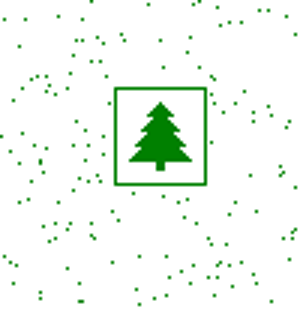

In [5]:
def draw_picture(robots_pos, robots_vel, n):
    from PIL import Image, ImageDraw
    w, h = 101, 103
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for pos, vel in zip(robots_pos, robots_vel):
        x, y = int(pos[0]), int(pos[1])
        x = (x + int(vel[0]) * n) % w
        y = (y + int(vel[1]) * n) % h
        draw.point((x, y), fill='green')

    # lets scale the image
    img = img.resize((3 * w, 3 * h))
    img.show()

draw_picture(robots_pos, robots_vel, 8258)

## Day 15

In [1]:
with open('day 15/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(71, 50)

In [30]:
wh_map = []
moves = []
mode = 0
for line in lines:
    if line == '\n':
        mode += 1
        continue
    if mode == 0:
        wh_map.append(list(line[:-1]))
    elif mode == 1:
        moves += list(line[:-1])

# wh_map[:10], moves[:10]

In [31]:
dirs = {'^': (-1, 0), '>': (0, 1), 'v': (1, 0), '<': (0, -1)}

def shift(pos, dir):
    next_pos = (pos[0] + dirs[dir][0], pos[1] + dirs[dir][1])
    next = wh_map[next_pos[0]][next_pos[1]]
    while next == 'O':
        next_pos = (next_pos[0] + dirs[dir][0], next_pos[1] + dirs[dir][1])
        next = wh_map[next_pos[0]][next_pos[1]]
        wh_map[next_pos[0]][next_pos[1]] = 'O' if next != '#' else '#'

    if next != '#':
        wh_map[pos[0]][pos[1]] = '.'
        pos = (pos[0] + dirs[dir][0], pos[1] + dirs[dir][1])
        wh_map[pos[0]][pos[1]] = '@'
        return pos
    return pos
        

In [4]:
def find_start():
    start = None
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == '@':
                start = (i, j)
                break
    
    return start

start = find_start()
start

(24, 48)

In [33]:
def compute_gps():
    gps = 0
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == 'O':
                gps += 100 * i + j
    
    return gps

In [35]:
cur_pos = start
for move in moves:
    cur_pos = shift(cur_pos, move)

cur_pos

(32, 16)

In [36]:
compute_gps()

1568399

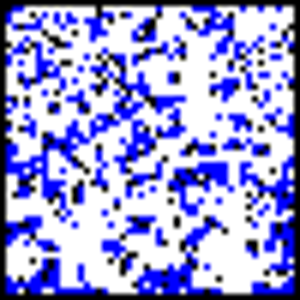

In [37]:
def draw_map():
    from PIL import Image, ImageDraw
    w, h = len(wh_map[0]), len(wh_map)
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == 'O':
                draw.point((j, i), fill='blue')
            if wh_map[i][j] == '#':
                draw.point((j, i), fill='black')

    # lets scale the image
    img = img.resize((6 * w, 6 * h))
    img.show()

draw_map()

In [8]:
def get_map(lines):
    wh_map = []
    moves = []
    mode = 0
    for line in lines:
        if line == '\n':
            mode += 1
            continue
        if mode == 0:
            wh_map.append(list(line[:-1]))
        elif mode == 1:
            moves += list(line[:-1])
    
    return wh_map, moves

# wh_map[:10], moves[:10]

In [9]:
def scale_map(wh_map):
    wh_map_scaled = [[] for _ in range(len(wh_map))]
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == '#':
                wh_map_scaled[i] += ['#', '#']
            if wh_map[i][j] == 'O':
                wh_map_scaled[i] += ['[', ']']
            if wh_map[i][j] == '.':
                wh_map_scaled[i] += ['.', '.']
            if wh_map[i][j] == '@':
                wh_map_scaled[i] += ['@', '.']   
    
    return wh_map_scaled

map_, moves = get_map(lines)
wh_map = scale_map(map_)   

In [4]:
len(wh_map), len(wh_map[0])

(50, 100)

(50, 100)

In [5]:
from functools import cache


def shift(pos, dir, map, seen):
    dirs = {'^': (-1, 0), '>': (0, 1), 'v': (1, 0), '<': (0, -1)}
    # print(pos, dir)
    seen.add((pos, dir))
    next_pos = (pos[0] + dirs[dir][0], pos[1] + dirs[dir][1])
    next = map[next_pos[0]][next_pos[1]]
    can_move = True
    if next == '[' or next == ']':
        if dir == '^' or dir == 'v':
            if next == ']' and ((pos[0], pos[1] - 1), dir) not in seen:
                can_move &= shift((pos[0], pos[1] - 1), dir, map, seen)
            elif next == '[' and ((pos[0], pos[1] + 1), dir) not in seen:
                can_move &= shift((pos[0], pos[1] + 1), dir, map, seen)
        
        if ((next_pos[0], next_pos[1]), dir) not in seen:
            can_move &= shift((next_pos[0], next_pos[1]), dir, map, seen)
        
        

    if can_move and next != '#':
        next_pos = (pos[0] + dirs[dir][0], pos[1] + dirs[dir][1])
        map[next_pos[0]][next_pos[1]] = map[pos[0]][pos[1]]
        map[pos[0]][pos[1]] = '.'
        return can_move
    return False
        

In [12]:
start = find_start()
start

(24, 48)

In [11]:
def simulate(wh_map, moves):
    dirs = {'^': (-1, 0), '>': (0, 1), 'v': (1, 0), '<': (0, -1)}
    cur_pos = (24, 48)
    map = wh_map.copy()
    for move in moves:  
        seen = set()
        if shift(cur_pos, move, map, seen):
            cur_pos = (cur_pos[0] + dirs[move][0], cur_pos[1] + dirs[move][1])
            print(cur_pos, wh_map[24][48])


simulate(wh_map.copy(), moves)

(24, 49) .
(25, 49) .
(24, 49) .
(23, 49) .
(23, 50) .
(23, 51) .
(22, 51) .
(21, 51) .
(22, 51) .
(23, 51) .
(23, 50) .
(23, 49) .
(23, 48) .
(24, 48) @
(23, 48) .
(23, 47) .
(23, 48) .
(24, 48) @
(23, 48) .
(24, 48) @
(23, 48) .
(23, 47) .
(22, 47) .
(22, 48) .
(22, 49) .
(23, 49) .
(22, 49) .
(23, 49) .
(23, 50) .
(23, 51) .
(23, 50) .
(22, 50) .
(22, 49) .
(22, 50) .
(23, 50) .
(23, 51) .
(22, 51) .
(23, 51) .
(22, 51) .
(23, 51) .
(23, 52) .
(23, 53) .
(23, 54) .
(22, 54) .
(23, 54) .
(23, 55) .
(24, 55) .
(24, 54) .
(25, 54) .
(24, 54) .
(24, 53) .
(23, 53) .
(23, 54) .
(23, 55) .
(23, 54) .
(22, 54) .
(21, 54) .
(22, 54) .
(21, 54) .
(21, 55) .
(21, 56) .
(21, 57) .
(21, 58) .
(21, 57) .
(21, 56) .
(21, 55) .
(21, 56) .
(21, 57) .
(20, 57) .
(19, 57) .
(19, 58) .
(19, 57) .
(18, 57) .
(18, 58) .
(19, 58) .
(19, 57) .
(19, 58) .
(19, 59) .
(19, 60) .
(19, 59) .
(19, 60) .
(18, 60) .
(19, 60) .
(19, 59) .
(18, 59) .
(19, 59) .
(19, 58) .
(18, 58) .
(18, 57) .
(18, 58) .
(18, 59) .

In [10]:
def compute_gps():
    gps = 0
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == '[':
                gps += 100 * i + j
    
    return gps

In [11]:
compute_gps()

1549294

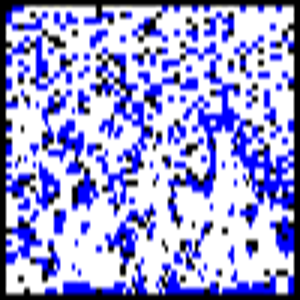

In [12]:
def draw_map(wh_map):
    from PIL import Image, ImageDraw
    w, h = len(wh_map[0]), len(wh_map)
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for i in range(len(wh_map)):
        for j in range(len(wh_map[0])):
            if wh_map[i][j] == '[' or wh_map[i][j] == ']':
                draw.point((j, i), fill='blue')
            if wh_map[i][j] == '#':
                draw.point((j, i), fill='black')

    # lets scale the image
    img = img.resize((3 * w, 6 * h))
    img.show()

draw_map(wh_map)

## Day 16

In [77]:
with open('day 16/input.txt') as f:
    lines = f.readlines()

m, n = len(lines), len(lines[0]) - 1
m, n

(142, 141)

In [78]:
def build_maze(lines):
    return [list(line[:-1]) for line in lines]

maze = build_maze(lines)

In [85]:
from PIL import Image, ImageDraw

def dijkstra_matrix(maze: list[list[str]], start: tuple, end: tuple, draw=None) -> int:

    from heapq import heappop, heappush
    from collections import defaultdict

    dirs = ['^', '>', 'v', '<']
    moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    start_dir = 1
    seen = {start: 0}
    predecessors = defaultdict(list)
    pq = [(0, start, start_dir)]
    min_score = -1

    while pq:
        dist, cur_pos, cur_dir = heappop(pq)
        if cur_pos == end:
            min_score = dist 
            break
        for dir, (dr, dc) in enumerate(moves):
            next_pos = (cur_pos[0] + dr, cur_pos[1] + dc)
            if maze[next_pos[0]][next_pos[1]] == '#':
                continue
            cost = 0
            if dir == cur_dir:
                cost = 1
            elif (dir - cur_dir) % 4 in (1, 3):
                cost = 1001
            else:
                cost = 2001
            # if next_pos in seen and seen[next_pos] < dist + cost:
            #     continue
            
            if next_pos not in seen or seen[next_pos] > dist + cost: 
                seen[next_pos] = dist + cost
                predecessors[next_pos] = [cur_pos]
                heappush(pq, (dist + cost, next_pos, dir))
            elif seen[next_pos] == dist + cost:
                # heappush(pq, (dist + cost, next_pos, dir))
                predecessors[next_pos].append(cur_pos)

    paths = set([end])
    cur_cells = [end]
    # print([(k, v) for k, v in predecessors.items() if len(v) > 1])
    while cur_cells:
        cur_cells_new = []
        for step in cur_cells:
            for new_step in predecessors[step]:
                if new_step not in paths:
                    cur_cells_new += [new_step]
                    paths.add(new_step)
        
        cur_cells = cur_cells_new

    if draw:
        for r, c in paths:
            draw.point((c, r), fill='blue')
    
    return min_score, len(paths)


In [86]:
dijkstra_matrix(maze, (139, 1), (1, 139)) #  (15, 1), (1, 15)

(107512, 528)

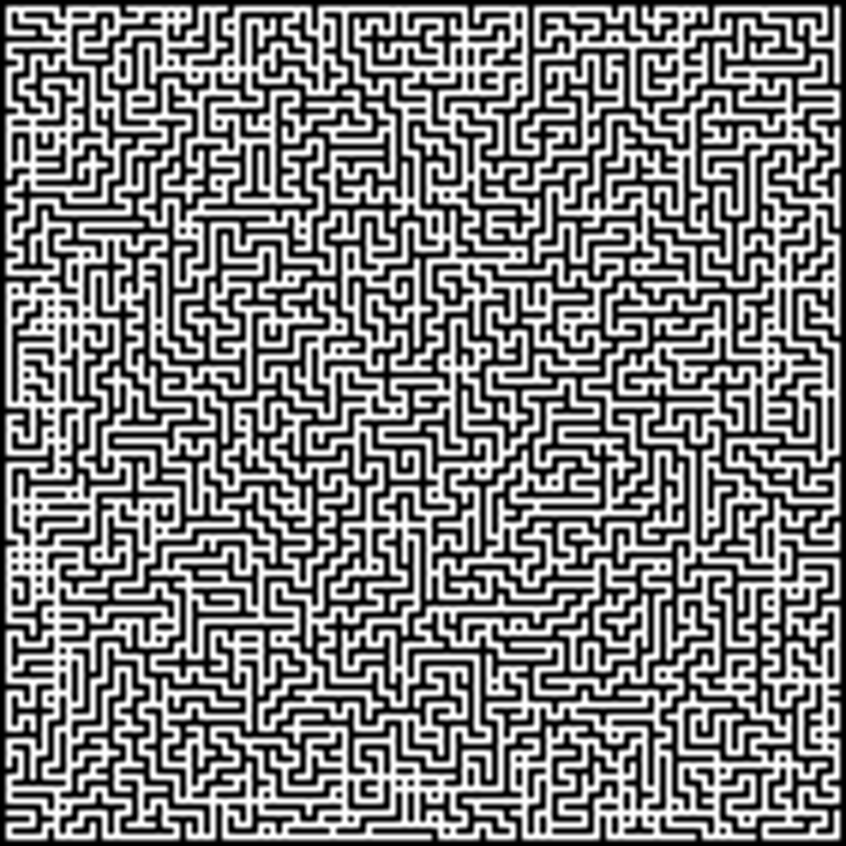

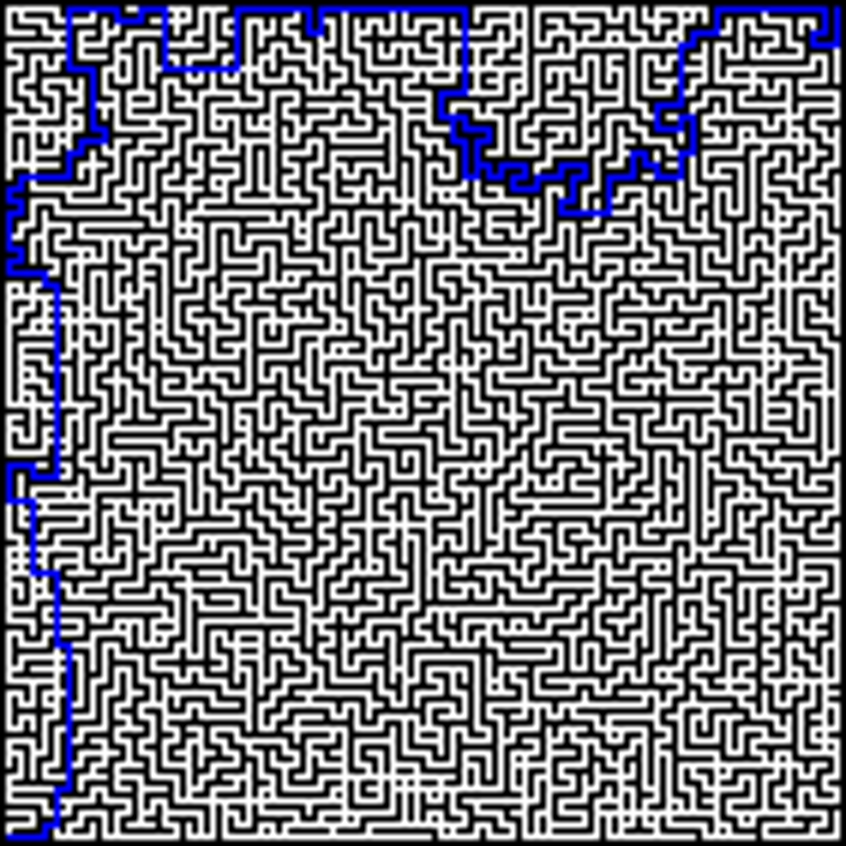

In [87]:
def draw_maze(maze, path=False):
    from PIL import Image, ImageDraw
    w, h = 141, 141 # 17, 17
    img = Image.new('RGB', (w, h), color = 'white')
    draw = ImageDraw.Draw(img)
    for i in range(w):
        for j in range(h):
            if maze[i][j] == '#':
                draw.point((j, i), fill='black')

    if path:
        dijkstra_matrix(maze, (139, 1), (1, 139), draw)
        # dijkstra_matrix(maze, (15, 1), (1, 15), draw) 
    # lets scale the image
    img = img.resize((6 * w, 6 * h))
    img.show()

draw_maze(maze)
draw_maze(maze, path=True)